In [1]:
import numpy as np
import pandas as pd
import sklearn
from scipy import random

import matplotlib.pyplot as plt

In [11]:
random.seed(42)

In [12]:
num_distros = 2
means = random.randint(-10, 10, (num_distros, 2))
stds = random.randint(15, 20, (num_distros, 2))

In [13]:
num_obs = 100

In [14]:
class1 = random.multivariate_normal(means[1], np.diag(stds[1]), size = num_obs)
class0 = random.multivariate_normal(means[0], np.diag(stds[0]), size = num_obs)

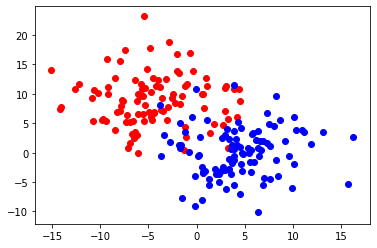

In [15]:
plt.scatter(class0[:,0], class0[:,1], c='red')
plt.scatter(class1[:,0], class1[:,1], c='blue')

# Fit linear model

In [16]:
X = np.vstack([class0, class1])
Y = np.hstack([np.zeros(num_obs), np.ones(num_obs)]).reshape(-1,1)

In [19]:
import statsmodels.api as sm

In [20]:
smodel = sm.OLS(Y, sm.add_constant(X))

In [21]:
sres = smodel.fit()

In [22]:
sres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     219.9
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           6.56e-51
Time:                        13:03:12   Log-Likelihood:                -27.848
No. Observations:                 200   AIC:                             61.70
Df Residuals:                     197   BIC:                             71.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6777      0.026     26.128      0.000       0.627       0.729
x1             0.0398      0.004     10.597      0.000       0.032       0.047
x2            -0.0389      0.004    -10.280      0.000      -0.046      -0.031
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.048
Skew:                          -0.025   Prob(JB):                        0.976
Kurtosis:                       3.058   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
sres.params

array([ 0.6777157 ,  0.03976515, -0.03889737])

decision line is defined as: $\beta_0 + \beta_1 X_1 + \beta2_2 X_2 = 0.5$

In [24]:
def decision_line(x):
    return (0.5 - sres.params[0] - sres.params[1]*x)/sres.params[2]

In [25]:
xmin,xmax = (X[:,0].min(),X[:,0].max())
ymin,ymax = (X[:,1].min(),X[:,1].max())

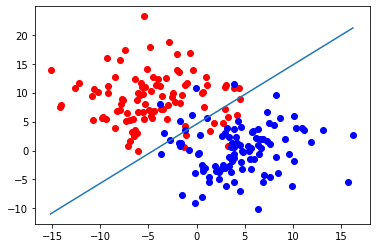

In [26]:
plt.scatter(class0[:,0], class0[:,1], c='red')
plt.scatter(class1[:,0], class1[:,1], c='blue')
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,decision_line(xvals) )

# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X,Y.ravel())

KNeighborsClassifier()

In [64]:
y_pred = classifier.predict(X)

In [65]:
y_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.])

In [66]:
Y.ravel()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [67]:
xmin,xmax = (X[:,0].min(),X[:,0].max())
ymin,ymax = (X[:,1].min(),X[:,1].max())

In [68]:
lin_dim = 300
xgrid, ygrid = np.meshgrid(np.linspace(xmin, xmax, lin_dim), np.linspace(ymin, ymax, lin_dim))

In [69]:
xgrid.shape

(300, 300)

In [70]:
flatx = xgrid.flatten()
flaty = ygrid.flatten()

In [71]:
meshpts = np.column_stack([flatx, flaty])

In [72]:
grid_pred = classifier.predict(meshpts)

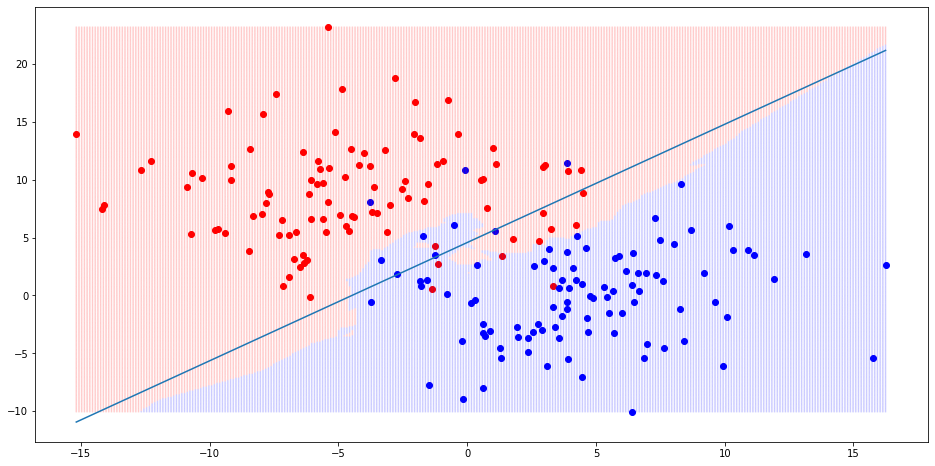

In [73]:
plt.figure (figsize= (16,8)) 
plt.scatter(class0[:,0], class0[:,1], c='red')
plt.scatter(class1[:,0], class1[:,1], c='blue')
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,decision_line(xvals) )
plt.scatter(flatx, flaty, c=['b' if x else 'r' for x in grid_pred], alpha=0.1, s=1)
plt.show()


In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[95  5]
 [ 4 96]]
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       100
         1.0       0.95      0.96      0.96       100

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



In [75]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X,Y.ravel())

KNeighborsClassifier(n_neighbors=1)

In [76]:
lin_dim = 300 
xmin,xmax = (X[:,0].min(),X[:,0].max())
ymin,ymax = (X[:,1].min(),X[:,1].max())
xgrid, ygrid = np.meshgrid(np.linspace(xmin, xmax, lin_dim), np.linspace(ymin, ymax, lin_dim))
flatx = xgrid.flatten()
flaty = ygrid.flatten()
meshpts = np.column_stack([flatx, flaty])

In [77]:
grid_pred = classifier.predict(meshpts)

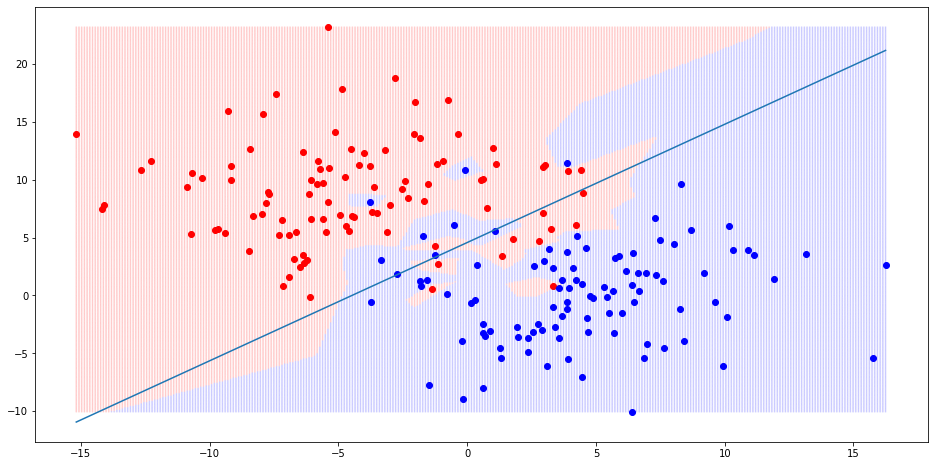

In [78]:
plt.figure (figsize= (16,8)) 
plt.scatter(class0[:,0], class0[:,1], c='red' )
plt.scatter(class1[:,0], class1[:,1], c='blue')
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,decision_line(xvals) )
plt.scatter(flatx, flaty, c=['b' if x else 'r' for x in grid_pred], alpha=0.1, s=1)
plt.show()


In [79]:
y_pred = classifier.predict(X)

In [80]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[100   0]
 [  0 100]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

